Aula Regressão Linear

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Revisão Numpy

In [12]:
# vetores de zeros
vetor_zeros = np.zeros(5)
print("Vetor de zeros : ", vetor_zeros)

Vetor de zeros :  [0. 0. 0. 0. 0.]


In [11]:
# vetor de um
vetor_um = np.ones(5)
print("Vetor de uns : ", vetor_um)

Vetor de uns :  [1. 1. 1. 1. 1.]


In [13]:
# vetor com valores diversificados
vetor_variado = np.random.rand(5)
print("vetor aleatório : ", vetor_variado)

vetor aleatório :  [0.76367574 0.79433869 0.43006127 0.69552621 0.28896695]


In [16]:
# operações com vetores + e *
vetor_zeros + vetor_um

array([1., 1., 1., 1., 1.])

In [17]:
vetor_variado * 2

array([1.52735147, 1.58867739, 0.86012255, 1.39105242, 0.57793391])

Vamos gerar uma pequena base fictícia para o seguinte problema:

Seja x a quantidade de horas que um aluno estudou por semana, qual será a nota f(x) obtida na disciplina de IA?

Para isso, vamos propor uma função-conceito f que produz uma curva não trivial.

In [23]:
f = lambda x: (np.sin(x + 4.6) + np.sin(1.7*x + 4.8) + 3) + 2.3389

In [24]:
# gerando um gráfico para o intervalo [0, 5], utilizando o linspace para gerar 100 pontos no gráfico
x100 = np.linspace(0, 5, 100)
x100

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

In [25]:
# y gerando para o ponto no eixo y
y100 = f(x100)
y100

array([3.34904439, 3.35582236, 3.37240227, 3.39865306, 3.43438472,
       3.47934964, 3.53324446, 3.59571217, 3.66634466, 3.74468562,
       3.8302337 , 3.92244603, 4.02074199, 4.12450723, 4.23309796,
       4.3458453 , 4.46205996, 4.58103691, 4.7020602 , 4.82440781,
       4.94735657, 5.070187  , 5.19218817, 5.3126624 , 5.43092993,
       5.54633336, 5.65824196, 5.7660558 , 5.86920952, 5.96717596,
       6.05946946, 6.14564879, 6.22531984, 6.29813788, 6.36380948,
       6.42209408, 6.47280511, 6.51581077, 6.55103437, 6.57845427,
       6.59810348, 6.61006876, 6.61448942, 6.61155573, 6.60150691,
       6.58462883, 6.56125139, 6.53174553, 6.49651999, 6.45601783,
       6.41071271, 6.36110491, 6.30771726, 6.25109086, 6.19178074,
       6.13035138, 6.0673723 , 6.00341348, 5.93904094, 5.87481233,
       5.81127259, 5.74894974, 5.6883509 , 5.62995835, 5.57422593,
       5.52157565, 5.47239452, 5.4270317 , 5.38579599, 5.34895361,
       5.31672632, 5.28928991, 5.26677308, 5.24925669, 5.23677

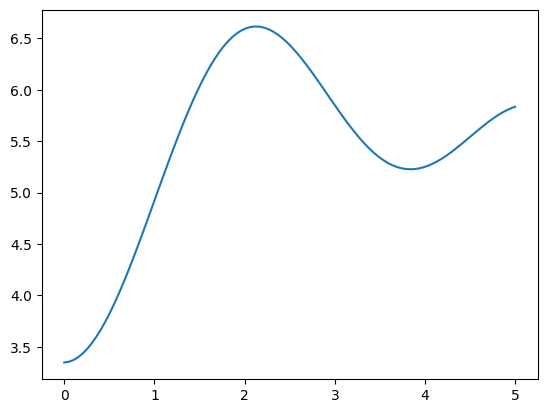

In [26]:
plt.plot(x100, y100)

Uma pequena base de treinamento

Cada exemplo da nossa amostra será um par (xi, yi). O valor xi é um atributo de entrada que caracteriza o exemplo.
Já o valor yi é um atributo-alvo chamado rótulo. Em problemas de regressão o rótulo é um valor numérico e o objetivo do Aprendizado de Máquina 
é prever o rótulo correto y1 (nota) para um valor de entrada xi (quantidade de horas estudadas).

Para cada xi, o valor yi de será calculado da seguinte forma: yi = f(xi) + zi

In [27]:
state = np.random.RandomState(42)
noise = state.normal(loc=0, scale=0.2, size=11)

In [33]:
x = np.linspace(0, 5, 11)
y = f(x) + noise
x, y

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([3.44838722, 3.79371688, 5.05229106, 6.33701018, 6.54434125,
        6.38710756, 6.16512634, 5.49227889, 5.15657363, 5.65040223,
        5.74145944]))

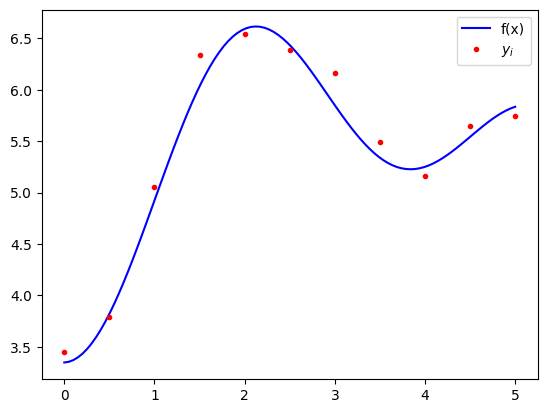

In [36]:
# visualizando os dados no gráfico
plt.plot(x100, f(x100), 'blue', label='f(x)');
plt.plot(x, y, '.r', label='$y_i$');
plt.legend();

In [37]:
# organizando os dados em dataframe
pd.DataFrame(np.array([x, y]).T, columns=["Estudo por dia", "Nota"])

,Estudo por dia,Nota
0,0.0,3.448387
1,0.5,3.793717
2,1.0,5.052291
3,1.5,6.337010
4,2.0,6.544341
5,2.5,6.387108
6,3.0,6.165126
7,3.5,5.492279
8,4.0,5.156574
9,4.5,5.650402


Treinando um modelo de regressão com o scikit-learn

Modelo de regressão

O nosso modelo ^h(x) será uma função de regressão linear. Ela terá a seguinte forma: ^h(x) = w0 + w1 * x

Lembrando um pouco de geometria analítica, podemos ver que ^h é a equação de uma reta. O nosso modelo vai tentar "encaixar" os pontos do conjunto 
de treinamento em uma reta.

Observe que o nosso modelo usa a variável de entrada x e dois valores adicionais:

- w0 é um viés
- w1 é um parâmetro (que, no contexto de regressão, também é chamado peso)

O objetivo do treinamento é buscar (aprender) os melhores parâmetros para o conjunto de dados.

In [39]:
# Vamos treinar o modelo utilizando a implementação do Python na biblioteca scikit-learn.
from sklearn.linear_model import LinearRegression

In [40]:
h = LinearRegression()

Um ponto importante do scikit-learn é que os dados de entrada dos modelos devem estar em matrizes.

In [41]:
# dados guardados em um vetor
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

Podemos converter esse vetor em uma matriz de 11 linhas e 1 coluna utilizando o método reshape dos vetores NumPy. 
Mas ao invés de especificar o número de linhas, podemos especificar -1, então o NumPy se encarregará de encontrar o máximo de linahs necessário.

In [44]:
X = x.reshape(-1, 1)
X

array([[0. ],
       [0.5],
       [1. ],
       [1.5],
       [2. ],
       [2.5],
       [3. ],
       [3.5],
       [4. ],
       [4.5],
       [5. ]])

Agora nós ajustamos o modelo aos dados. Isso é feito com o método fit. Ele deve receber como argumentos a matriz que contém 
os atributos de entrada e o vetor que contém os atributos de saída.

In [45]:
h.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Após a execução do método fit, o modelo aprendeu o melhor conjunto de parâmetros para os dados de treinamento.

O atributo intercept_ contém o valor do peso w0. O atributo coef_ é um vetor que guarda os valores dos demais pesos. Como nosso modelo tem a forma  
y(x) = w0 + w1x1, então esse vetor só tem um elemento:

In [46]:
h.coef_

array([0.3115686])

In [47]:
h.intercept_

np.float64(4.6545962083300205)

Para fazer inferências com o modelo, usamos o método predict. Ele deve receber como entrada uma matriz de exemplos.

Vamos ver, por exemplo, quais notas seriam obtidas pelos alunos que estudarem, respectivamente, 3 horas por semana e 10 horas por semana.

In [51]:
h.predict([[3],[10]])

array([5.58930199, 7.77028216])

Vamos verificar qual a saída do modelo para os próprios dados de treinamento:

In [52]:
ypred = h.predict(X)
ypred

array([4.65459621, 4.81038051, 4.9661648 , 5.1219491 , 5.2777334 ,
       5.4335177 , 5.58930199, 5.74508629, 5.90087059, 6.05665489,
       6.21243919])

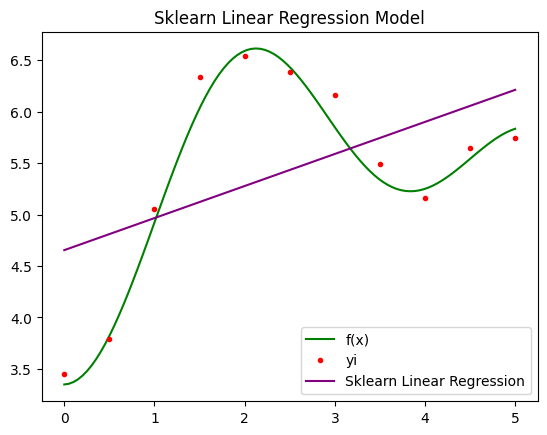

In [53]:
# plotando o gráfico
plt.figure()
plt.plot(x100, f(x100), 'g', label='f(x)');
plt.plot(x, y, '.r', label='yi');
plt.plot(x, ypred, 'purple', label='Sklearn Linear Regression');
plt.legend();
plt.title('Sklearn Linear Regression Model')
plt.show()

In [ ]:
Mais atributos